In [6]:
import pandas as pd
import matplotlib.pyplot as plt

import folium
from folium import plugins

In [2]:
df = pd.read_csv('../data/airbnb_listings.csv')

In [3]:
df.head()

id                       listing_url       scrape_id last_scraped  \
0  177  https://www.airbnb.com/rooms/177  20220926045611   2022-09-26   
1  360  https://www.airbnb.com/rooms/360  20220926045611   2022-09-26   
2  364  https://www.airbnb.com/rooms/364  20220926045611   2022-09-26   
3  590  https://www.airbnb.com/rooms/590  20220926045611   2022-09-26   
4  592  https://www.airbnb.com/rooms/592  20220926045611   2022-09-26   

            source                                               name  \
0      city scrape   Tiny Home in the Heart of the City- ECO FRIENDLY   
1      city scrape  Sit in the Peaceful Garden of the Chickadee Co...   
2      city scrape                Lodo / RiNo LOFT  via airport train   
3      city scrape                  Comfortable  - and a great value!   
4  previous scrape                                            private   

                                         description  \
0  160 sq ft + 80 sq ft loft for sleeping, Sleeps...   
1  Enjoy the famous Colorado weather and unplug i...   
2  Modern 1,000 square foot loft in the heart of ...   
3  Large guest room in my home, where I also live...   
4  This room is in the basement.  It does not hav...   

                               neighborhood_overview  \
0  Quiet neighborhood next to park, creeks and bi...   
1  The cottage is located in the center of Lower ...   
2  Ten brewpubs within walking distance, two grea...   
3  I love the diversity of my neighborhood and it...   
4                                                NaN   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/a1745ab2-b3a0...      615  ...   
1  https://a0.muscache.com/pictures/monet/Select-...      666  ...   
2  https://a0.muscache.com/pictures/11766413/a2c5...      783  ...   
3  https://a0.muscache.com/pictures/110931/30991c...      933  ...   
4  https://a0.muscache.com/pictures/miso/Hosting-...      933  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.94                   4.85                4.78   
1                        5.00                   5.00                4.91   
2                        4.96                   4.65                4.71   
3                        4.95                   4.75                4.85   
4                        4.94                   4.80                4.86   

            license instant_bookable calculated_host_listings_count  \
0  2016-BFN-0004968                f                              2   
1  2017-BFN-0002177                f                              2   
2               NaN                f                              1   
3  2021-BFN-0000578                f                              2   
4  2021-BFN-0000578                f                              2   

  calculated_host_listings_count_entire_homes  \
0                                           2   
1                                           2   
2                                           1   
3                                           0   
4                                           0   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            0   
3                                            2   
4                                            2   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              1.63  
1                                           0              3.43  
2                                           0              0.53  
3                                           0              4.08  
4                                           0              1.01  

[5 rows x 75 columns]

In [4]:
df.shape

(5836, 75)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5836 entries, 0 to 5835
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5836 non-null   int64  
 1   listing_url                                   5836 non-null   object 
 2   scrape_id                                     5836 non-null   int64  
 3   last_scraped                                  5836 non-null   object 
 4   source                                        5836 non-null   object 
 5   name                                          5836 non-null   object 
 6   description                                   5808 non-null   object 
 7   neighborhood_overview                         4181 non-null   object 
 8   picture_url                                   5836 non-null   object 
 9   host_id                                       5836 non-null   i

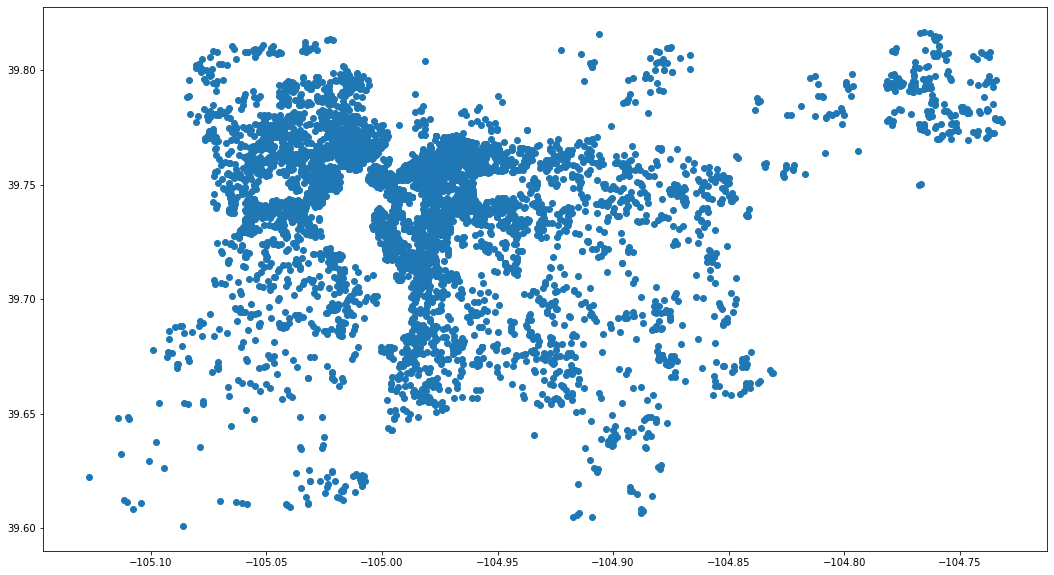

In [14]:
plt.figure(figsize = (18, 10))
plt.scatter(x = df['longitude'], y = df['latitude'])

plt.show();

In [27]:
locations = df[['id', 'latitude', 'longitude']]

In [30]:
locations.set_index('id', inplace = True)

In [15]:
empty_map = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], tiles = 'Stamen Terrain', zoom_start=12, control_scale=True)

In [16]:
empty_map

In [17]:
for index, location_info in df.iterrows():
    folium.Marker([location_info["latitude"], location_info["longitude"]], tooltip = index).add_to(empty_map)

In [19]:
airbnb_map = empty_map

# resetting the empty map
empty_map = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], tiles = 'Stamen Terrain', zoom_start=12, control_scale=True)

In [20]:
airbnb_map

In [31]:
plugins.MarkerCluster(locations).add_to(empty_map)

In [32]:
cluster_map = empty_map

# resetting the empty map
empty_map = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], tiles = 'Stamen Terrain', zoom_start=12, control_scale=True)

In [33]:
cluster_map